<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-11-11 14:16:32.540266


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

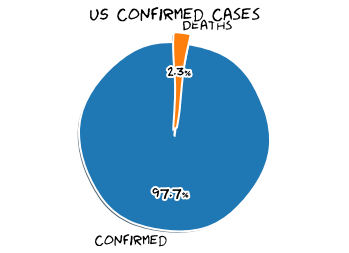

US Population
330362592
US Confirmed
10260282 (3.105763863240303% of population)
US Deaths
239398

New York City Confirmed
273583 (3.281624149840401% of population)
New York City Deaths
24060

Philippines Confirmed
401416
Philippines Deaths
7710



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

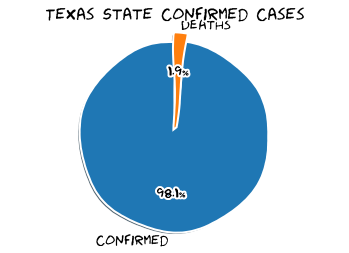

Texas State Total Population
28701845
Texas State Confirmed
1010364 (3.52020575680762% of population)
Texas State Deaths
19337 (1.9138647061850977% of confirmed)



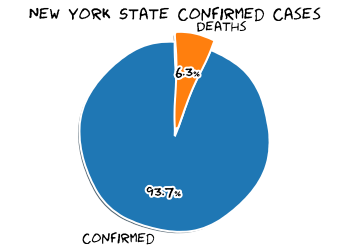

New York State Total Population
19542209
New York State Confirmed
536145 (2.743523007045928% of population)
New York State Deaths
33680 (6.281882699642821% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1605101126000,40.710881,-73.816847,80040,0,7310,72730,Queens,36081,"Queens, New York, US",3551.244133,None,None,84036081,USA
9,New York,US,1605101126000,40.636182,-73.949356,79073,0,7440,71633,Kings,36047,"Kings, New York, US",3088.906103,None,None,84036047,USA
18,New York,US,1605101126000,40.852093,-73.862828,57425,0,5010,52415,Bronx,36005,"Bronx, New York, US",4049.126820,None,None,84036005,USA
21,New York,US,1605101126000,40.740665,-73.589419,52173,0,2221,49952,Nassau,36059,"Nassau, New York, US",3844.946364,None,None,84036059,USA
22,New York,US,1605101126000,40.883201,-72.801217,51332,0,2022,49310,Suffolk,36103,"Suffolk, New York, US",3476.362267,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,New York,US,1605101126000,43.784416,-75.449040,186,0,0,186,Lewis,36049,"Lewis, New York, US",707.331914,None,None,84036049,USA
2730,New York,US,1605101126000,42.635055,-77.103699,176,0,7,169,Yates,36123,"Yates, New York, US",706.458475,None,None,84036123,USA
2812,New York,US,1605101126000,44.590409,-74.299260,147,0,0,147,Franklin,36033,"Franklin, New York, US",293.870697,None,None,84036033,USA
2865,New York,US,1605101126000,42.588317,-74.443390,130,0,0,130,Schoharie,36095,"Schoharie, New York, US",419.368367,None,None,84036095,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1605101126000,40.710881,-73.816847,80040,0,7310,72730,Queens,36081,"Queens, New York, US",3551.244133,None,None,84036081,USA
9,New York,US,1605101126000,40.636182,-73.949356,79073,0,7440,71633,Kings,36047,"Kings, New York, US",3088.906103,None,None,84036047,USA
18,New York,US,1605101126000,40.852093,-73.862828,57425,0,5010,52415,Bronx,36005,"Bronx, New York, US",4049.126820,None,None,84036005,USA
31,New York,US,1605101126000,40.767273,-73.971526,38384,0,3198,35186,New York,36061,"New York, New York, US",2356.717541,None,None,84036061,USA
105,New York,US,1605101126000,40.585822,-74.148086,18661,0,1102,17559,Richmond,36085,"Richmond, New York, US",3919.200744,None,None,84036085,USA


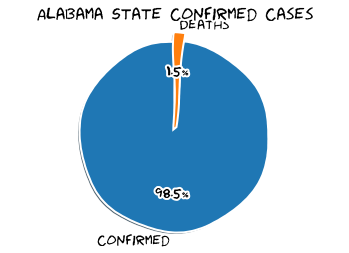

Alabama State Total Population
4887871
Alabama State Confirmed
206567 (4.2261139870508035% of population)
Alabama State Deaths
3120 (1.510405824744514% of confirmed)



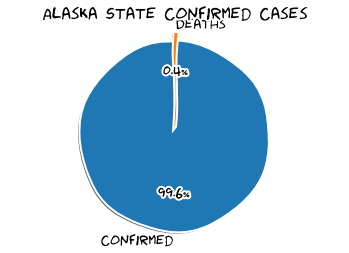

Alaska State Total Population
737438
Alaska State Confirmed
20832 (2.8249154505192298% of population)
Alaska State Deaths
92 (0.4416282642089093% of confirmed)



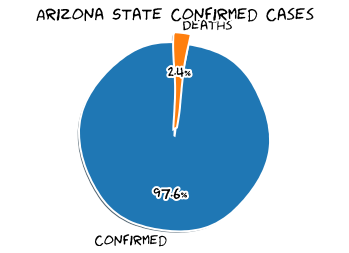

Arizona State Total Population
7171646
Arizona State Confirmed
263133 (3.6690740173176426% of population)
Arizona State Deaths
6192 (2.353182611075008% of confirmed)



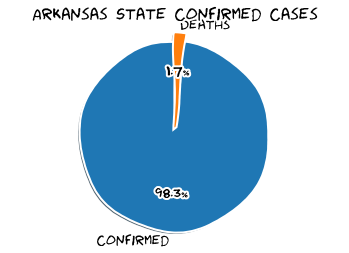

Arkansas State Total Population
3013825
Arkansas State Confirmed
124235 (4.122170331721318% of population)
Arkansas State Deaths
2112 (1.7000040246307402% of confirmed)



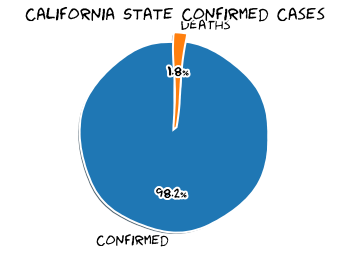

California State Total Population
39557045
California State Confirmed
991162 (2.505652280143777% of population)
California State Deaths
18076 (1.8237180198595184% of confirmed)



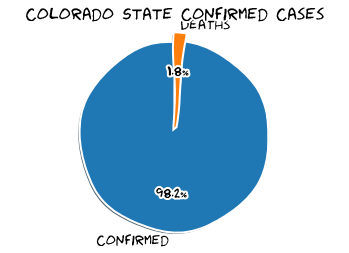

Colorado State Total Population
5695564
Colorado State Confirmed
138427 (2.4304353352890073% of population)
Colorado State Deaths
2427 (1.7532706769633093% of confirmed)



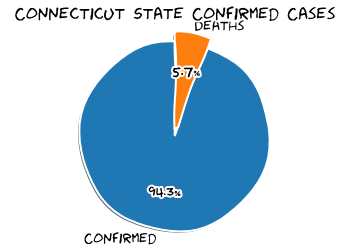

Connecticut State Total Population
3572665
Connecticut State Confirmed
82953 (2.321880165086847% of population)
Connecticut State Deaths
4707 (5.674297493761528% of confirmed)



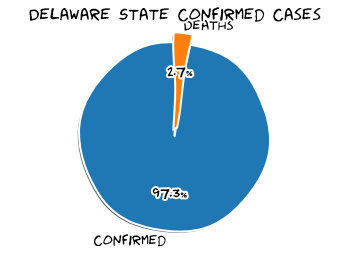

Delaware State Total Population
967171
Delaware State Confirmed
27112 (2.8032271439073337% of population)
Delaware State Deaths
722 (2.6630274417232225% of confirmed)



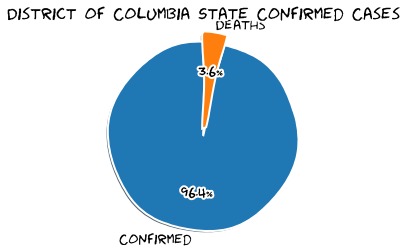

District of Columbia State Total Population
702455
District of Columbia State Confirmed
18173 (2.587069634353802% of population)
District of Columbia State Deaths
657 (3.615253397897981% of confirmed)



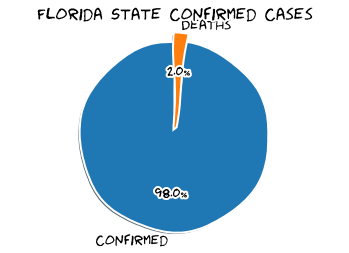

Florida State Total Population
21299325
Florida State Confirmed
852174 (4.000943691877559% of population)
Florida State Deaths
17248 (2.0239997934694087% of confirmed)



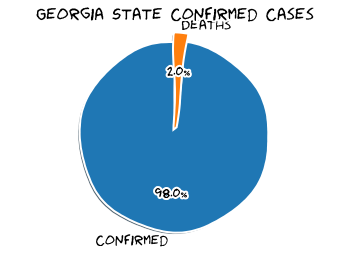

Georgia State Total Population
10519475
Georgia State Confirmed
411652 (3.913237114970091% of population)
Georgia State Deaths
8264 (2.0075209157249327% of confirmed)



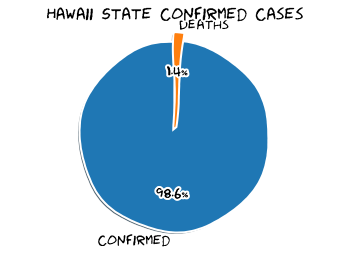

Hawaii State Total Population
1420491
Hawaii State Confirmed
16320 (1.1488985146685196% of population)
Hawaii State Deaths
222 (1.3602941176470589% of confirmed)



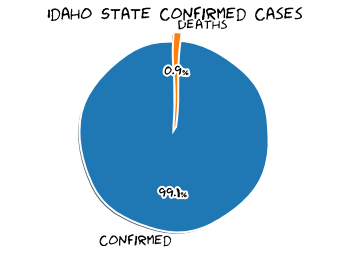

Idaho State Total Population
1754208
Idaho State Confirmed
75428 (4.29983217497583% of population)
Idaho State Deaths
714 (0.946598080288487% of confirmed)



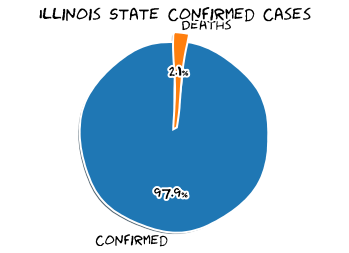

Illinois State Total Population
12741080
Illinois State Confirmed
511183 (4.012085317728167% of population)
Illinois State Deaths
10645 (2.0824244937722893% of confirmed)



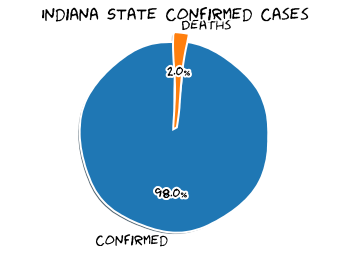

Indiana State Total Population
6691878
Indiana State Confirmed
219338 (3.2776748171440064% of population)
Indiana State Deaths
4481 (2.0429656511867527% of confirmed)



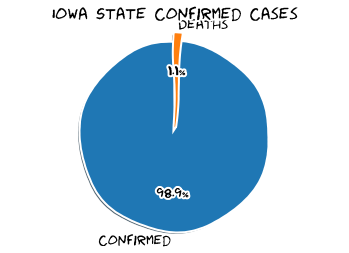

Iowa State Total Population
3156145
Iowa State Confirmed
166021 (5.260246281460453% of population)
Iowa State Deaths
1898 (1.1432288686371002% of confirmed)



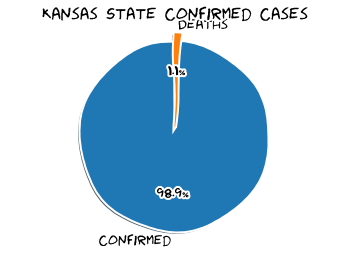

Kansas State Total Population
2911510
Kansas State Confirmed
105604 (3.6271213219257357% of population)
Kansas State Deaths
1139 (1.0785576303927882% of confirmed)



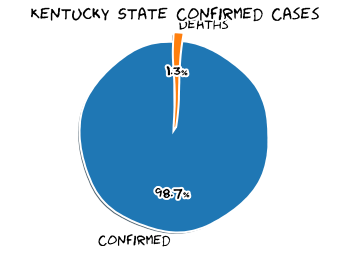

Kentucky State Total Population
4468402
Kentucky State Confirmed
124646 (2.789498348626646% of population)
Kentucky State Deaths
1590 (1.2756125346982654% of confirmed)



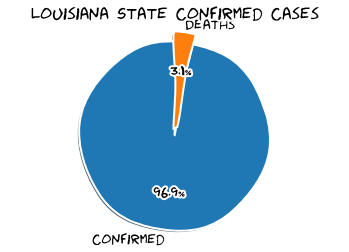

Louisiana State Total Population
4659978
Louisiana State Confirmed
194702 (4.17817423172384% of population)
Louisiana State Deaths
6058 (3.1114215570461528% of confirmed)



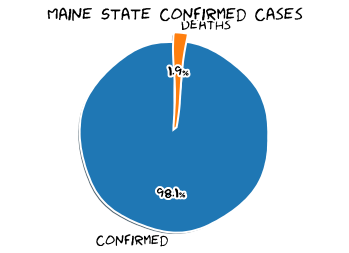

Maine State Total Population
1338404
Maine State Confirmed
8060 (0.6022097961452596% of population)
Maine State Deaths
156 (1.935483870967742% of confirmed)



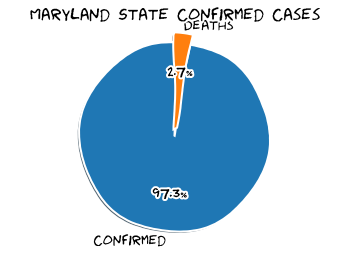

Maryland State Total Population
6042718
Maryland State Confirmed
156709 (2.5933528587632253% of population)
Maryland State Deaths
4213 (2.6884224900931026% of confirmed)



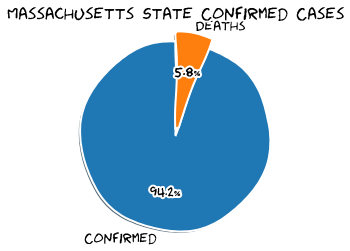

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
174881 (2.5337181217038345% of population)
Massachusetts State Deaths
10184 (5.823388475591974% of confirmed)



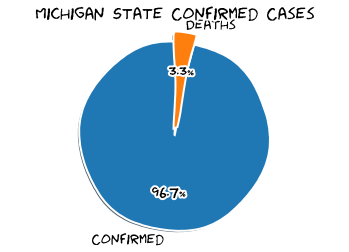

Michigan State Total Population
9995915
Michigan State Confirmed
245252 (2.4535222638447807% of population)
Michigan State Deaths
8094 (3.3002788968081807% of confirmed)



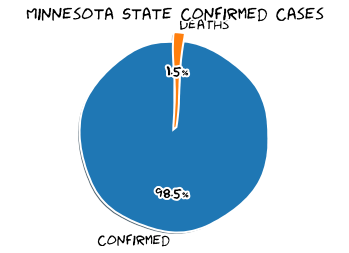

Minnesota State Total Population
5611179
Minnesota State Confirmed
189681 (3.380412565701433% of population)
Minnesota State Deaths
2752 (1.4508569651151144% of confirmed)



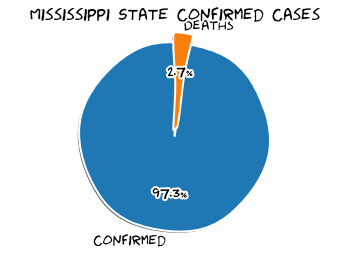

Mississippi State Total Population
2986530
Mississippi State Confirmed
128138 (4.290531151537068% of population)
Mississippi State Deaths
3480 (2.7158220044015047% of confirmed)



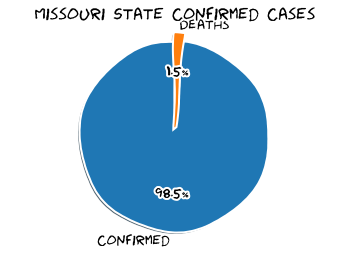

Missouri State Total Population
6126452
Missouri State Confirmed
220720 (3.6027377673080605% of population)
Missouri State Deaths
3307 (1.4982783617252626% of confirmed)



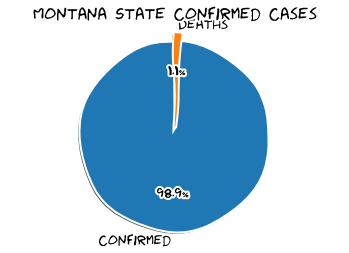

Montana State Total Population
1062305
Montana State Confirmed
41151 (3.873746240486489% of population)
Montana State Deaths
462 (1.1226944667201284% of confirmed)



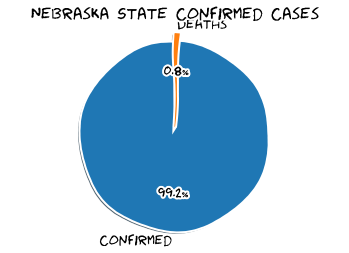

Nebraska State Total Population
1929268
Nebraska State Confirmed
87733 (4.547476037543773% of population)
Nebraska State Deaths
730 (0.8320700306612108% of confirmed)



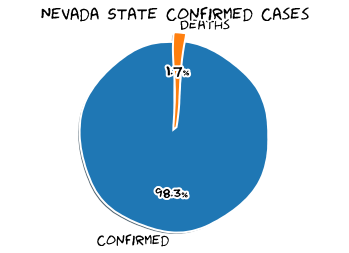

Nevada State Total Population
3034392
Nevada State Confirmed
112304 (3.701037967408298% of population)
Nevada State Deaths
1859 (1.6553283943581707% of confirmed)



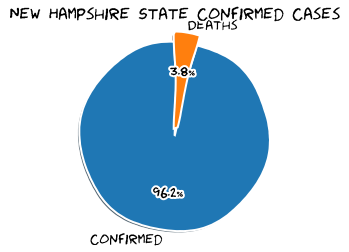

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
12919 (0.9524069304025631% of population)
New Hampshire State Deaths
489 (3.785122687514513% of confirmed)



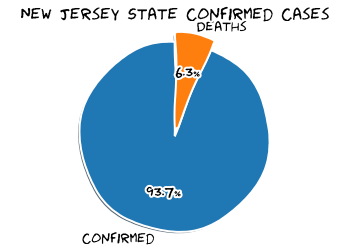

New Jersey State Total Population
8908520
New Jersey State Confirmed
260430 (2.9233812125919902% of population)
New Jersey State Deaths
16461 (6.320700380140537% of confirmed)



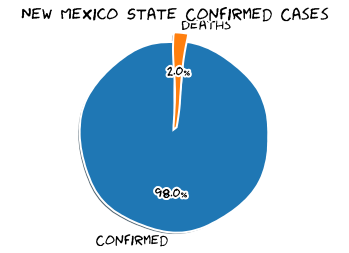

New Mexico State Total Population
2095428
New Mexico State Confirmed
57547 (2.74631244786268% of population)
New Mexico State Deaths
1144 (1.9879402922828298% of confirmed)



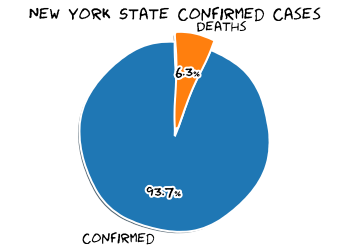

New York State Total Population
19542209
New York State Confirmed
536145 (2.743523007045928% of population)
New York State Deaths
33680 (6.281882699642821% of confirmed)



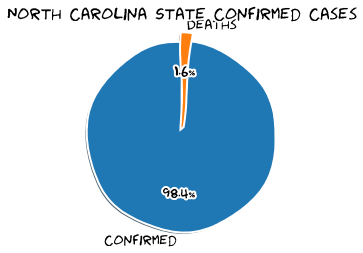

North Carolina State Total Population
10383620
North Carolina State Confirmed
297442 (2.864530866884574% of population)
North Carolina State Deaths
4660 (1.566691993733232% of confirmed)



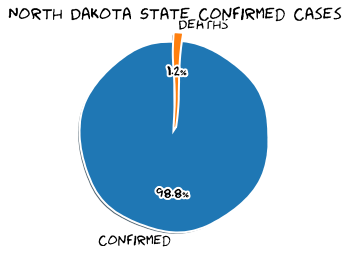

North Dakota State Total Population
760077
North Dakota State Confirmed
56352 (7.413985688292107% of population)
North Dakota State Deaths
674 (1.196053378762067% of confirmed)



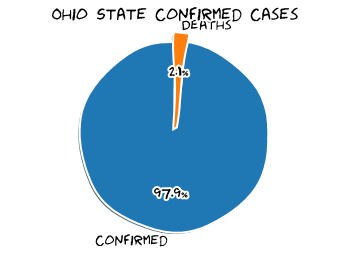

Ohio State Total Population
11689442
Ohio State Confirmed
261482 (2.2369074588846924% of population)
Ohio State Deaths
5547 (2.121369730994868% of confirmed)



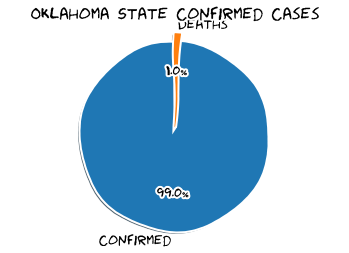

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
140157 (3.554506516354351% of population)
Oklahoma State Deaths
1451 (1.035267592770964% of confirmed)



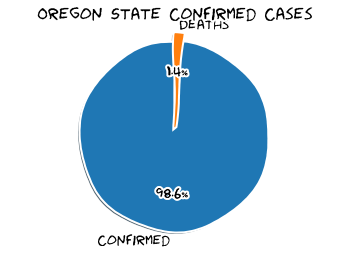

Oregon State Total Population
4190713
Oregon State Confirmed
51909 (1.2386675012104145% of population)
Oregon State Deaths
737 (1.419792328883238% of confirmed)



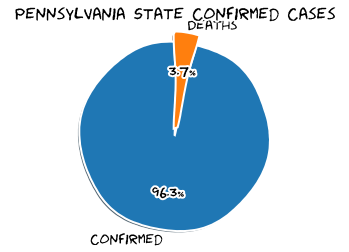

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
244046 (1.9055583404778302% of population)
Pennsylvania State Deaths
9079 (3.7202002901092412% of confirmed)



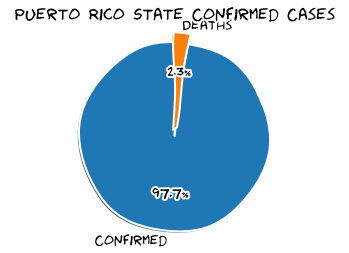

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
39120 (1.2243545144786494% of population)
Puerto Rico State Deaths
901 (2.3031697341513295% of confirmed)



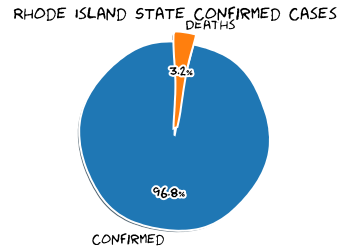

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
38798 (3.6694835503137666% of population)
Rhode Island State Deaths
1237 (3.188308675704933% of confirmed)



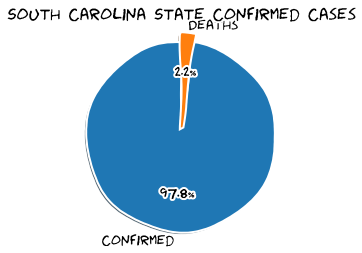

South Carolina State Total Population
5084127
South Carolina State Confirmed
187738 (3.6926300228141433% of population)
South Carolina State Deaths
4062 (2.163653602360737% of confirmed)



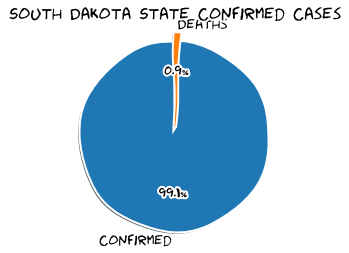

South Dakota State Total Population
882235
South Dakota State Confirmed
57334 (6.498721995840111% of population)
South Dakota State Deaths
540 (0.9418495133777514% of confirmed)



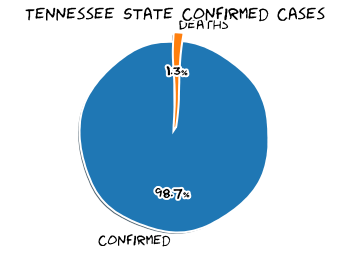

Tennessee State Total Population
6770010
Tennessee State Confirmed
289749 (4.279890280811993% of population)
Tennessee State Deaths
3672 (1.2673037698145637% of confirmed)



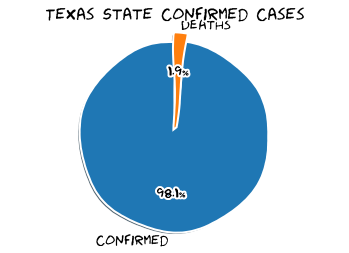

Texas State Total Population
28701845
Texas State Confirmed
1010364 (3.52020575680762% of population)
Texas State Deaths
19337 (1.9138647061850977% of confirmed)



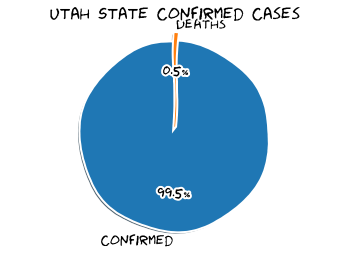

Utah State Total Population
3161105
Utah State Confirmed
137385 (4.346106820241656% of population)
Utah State Deaths
672 (0.4891363685991921% of confirmed)



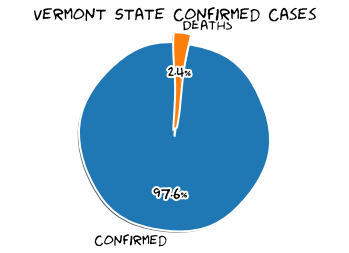

Vermont State Total Population
626299
Vermont State Confirmed
2462 (0.39310297477722306% of population)
Vermont State Deaths
59 (2.39642567018684% of confirmed)



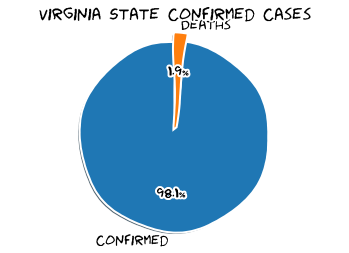

Virginia State Total Population
8517685
Virginia State Confirmed
194912 (2.2883212985688015% of population)
Virginia State Deaths
3726 (1.9116319159415534% of confirmed)



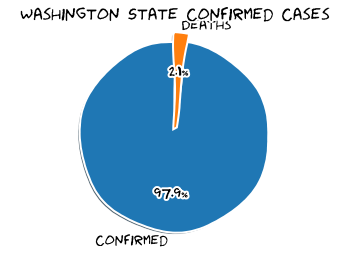

Washington State Total Population
7535591
Washington State Confirmed
120011 (1.5925890882347515% of population)
Washington State Deaths
2482 (2.0681437534892635% of confirmed)



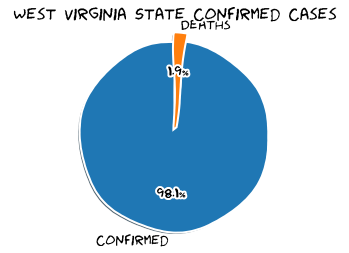

West Virginia State Total Population
1805832
West Virginia State Confirmed
29316 (1.6234068285421899% of population)
West Virginia State Deaths
546 (1.8624641833810889% of confirmed)



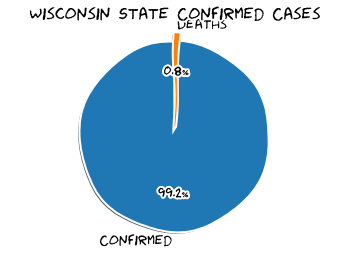

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
293812 (5.053901493884651% of population)
Wisconsin State Deaths
2395 (0.8151471008672213% of confirmed)



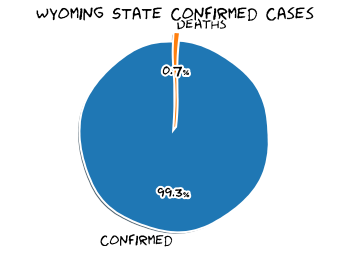

Wyoming State Total Population
577737
Wyoming State Confirmed
19242 (3.330581216020438% of population)
Wyoming State Deaths
127 (0.6600145515019229% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 51599927},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1274661},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-11-11T13:25:26.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 33628099},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-11-11 05:25:30,33.93911,67.709953,42463,1577,34954,5932,Afghanistan,109.07991172806463,3.7138214445517272
1,,,,Albania,2020-11-11 05:25:30,41.1533,20.1683,25294,579,12353,12362,Albania,878.9352977969282,2.2890804143275085
2,,,,Algeria,2020-11-11 05:25:30,28.0339,1.6596,63446,2077,42626,18743,Algeria,144.6852700858221,3.2736500330990133
3,,,,Andorra,2020-11-11 05:25:30,42.5063,1.5218,5477,75,4405,997,Andorra,7088.5912120623825,1.3693627898484573
4,,,,Angola,2020-11-11 05:25:30,-11.2027,17.8739,12816,308,6036,6472,Angola,38.99438780210762,2.403245942571785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,,,,West Bank and Gaza,2020-11-11 05:25:30,31.9522,35.2332,59422,533,51425,7464,West Bank and Gaza,1164.8138477630525,0.8969741846454176
3957,,,,Western Sahara,2020-11-11 05:25:30,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3958,,,,Yemen,2020-11-11 05:25:30,15.552727,48.516388,2071,605,1394,72,Yemen,6.943613699310614,29.212940608401738
3959,,,,Zambia,2020-11-11 05:25:30,-13.133897,27.849332,16997,350,16019,628,Zambia,92.45561727845735,2.059186915338001


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1605101126000,34.308284,-118.228241,326034,0,7202,318832,Los Angeles,06037,"Los Angeles, California, US",3247.639456,None,None,84006037,USA
1,Illinois,US,1605101126000,41.841448,-87.816588,227425,0,5828,221597,Cook,17031,"Cook, Illinois, US",4415.819634,None,None,84017031,USA
2,Florida,US,1605101126000,25.611236,-80.551706,195273,0,3690,191583,Miami-Dade,12086,"Miami-Dade, Florida, US",7187.240057,None,None,84012086,USA
3,Arizona,US,1605101126000,33.348359,-112.491815,169091,0,3728,165363,Maricopa,04013,"Maricopa, Arizona, US",3769.796946,None,None,84004013,USA
4,Texas,US,1605101126000,29.858649,-95.393395,168746,0,2871,165875,Harris,48201,"Harris, Texas, US",3580.190205,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,Texas,US,1605101126000,32.743640,-101.431651,3,0,0,3,Borden,48033,"Borden, Texas, US",458.715596,None,None,84048033,USA
3233,Idaho,US,1605101126000,NaN,NaN,1,0,0,1,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA
3234,New Mexico,US,1605101126000,35.857516,-103.822094,1,0,0,1,Harding,35021,"Harding, New Mexico, US",160.000000,None,None,84035021,USA
3235,Oregon,US,1605101126000,44.726982,-120.028143,1,0,0,1,Wheeler,41069,"Wheeler, Oregon, US",75.075075,None,None,84041069,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1605101126000,40.710881,-73.816847,80040,0,7310,72730,Queens,36081,"Queens, New York, US",3551.244133,None,None,84036081,USA
9,New York,US,1605101126000,40.636182,-73.949356,79073,0,7440,71633,Kings,36047,"Kings, New York, US",3088.906103,None,None,84036047,USA
18,New York,US,1605101126000,40.852093,-73.862828,57425,0,5010,52415,Bronx,36005,"Bronx, New York, US",4049.126820,None,None,84036005,USA
21,New York,US,1605101126000,40.740665,-73.589419,52173,0,2221,49952,Nassau,36059,"Nassau, New York, US",3844.946364,None,None,84036059,USA
22,New York,US,1605101126000,40.883201,-72.801217,51332,0,2022,49310,Suffolk,36103,"Suffolk, New York, US",3476.362267,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,New York,US,1605101126000,43.784416,-75.449040,186,0,0,186,Lewis,36049,"Lewis, New York, US",707.331914,None,None,84036049,USA
2730,New York,US,1605101126000,42.635055,-77.103699,176,0,7,169,Yates,36123,"Yates, New York, US",706.458475,None,None,84036123,USA
2812,New York,US,1605101126000,44.590409,-74.299260,147,0,0,147,Franklin,36033,"Franklin, New York, US",293.870697,None,None,84036033,USA
2865,New York,US,1605101126000,42.588317,-74.443390,130,0,0,130,Schoharie,36095,"Schoharie, New York, US",419.368367,None,None,84036095,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

536145

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
22,None,Philippines,1605101126000,12.879721,121.774017,401416,362217,7710,31489.0,None,None,Philippines,366.318695,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
